In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
%matplotlib inline

In [2]:
df1=pd.read_excel('park.xls')
df1.head()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
0,HARTFORD,CT,ACTIVE,BUILDING,29,OWNED
1,NEW HAVEN,CT,ACTIVE,BUILDING,0,OWNED
2,WATERBURY,CT,ACTIVE,BUILDING,2,LEASED
3,WILLIMANTIC,CT,ACTIVE,BUILDING,0,LEASED
4,HARTFORD,CT,ACTIVE,BUILDING,103,OWNED


In [3]:
#current conditions of all buildings

In [4]:
df1['Bldg Status'].value_counts()

ACTIVE            8981
EXCESS              70
DECOMMISSIONED       9
Name: Bldg Status, dtype: int64

In [5]:
#the total numbers of each property type

In [6]:
df1['Property Type'].value_counts()

BUILDING     8602
STRUCTURE     339
LAND          119
Name: Property Type, dtype: int64

In [7]:
# kind of ownership of the parking spaces

<BarContainer object of 9060 artists>

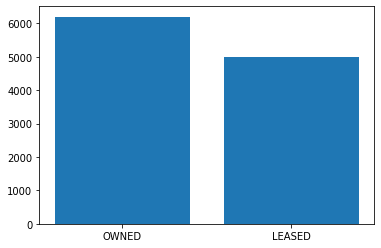

In [8]:
plt.bar(df1['Owned/Leased'],df1['Total Parking Spaces'])

In [9]:
#total number of parking space by type of ownership

In [10]:
Owned_Leased=pd.pivot_table(df1,index='Owned/Leased',values='Total Parking Spaces',aggfunc='sum')

In [11]:
Owned_Leased

,Total Parking Spaces
Owned/Leased,
LEASED,310269
OWNED,158210


<AxesSubplot:xlabel='Owned/Leased'>

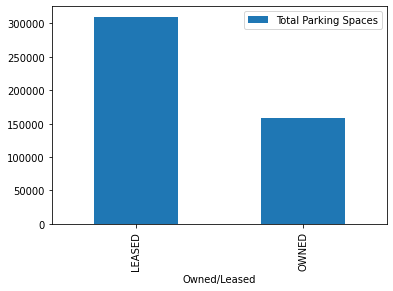

In [12]:
Owned_Leased.plot(kind='bar')

In [13]:
#conditions and total space by state

In [14]:
excess_parking=pd.pivot_table(df1,index='Bldg State',columns='Bldg Status',values='Total Parking Spaces')

In [15]:
excess_parking=excess_parking[excess_parking.EXCESS>0]

In [16]:
excess_parking

Bldg Status,ACTIVE,DECOMMISSIONED,EXCESS
Bldg State,,,
AL,62.357724,NaN,59.000000
CO,78.936709,NaN,22.200000
IL,45.000000,NaN,21.000000
LA,43.684932,NaN,68.666667
MD,104.185090,0.000000,43.166667
MO,121.200000,815.333333,254.272727
NE,54.060000,NaN,19.000000
NJ,32.169118,NaN,4.300000
NV,48.648649,NaN,173.000000


<AxesSubplot:xlabel='Bldg State'>

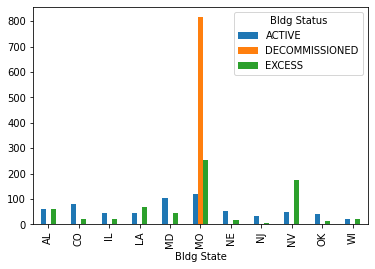

In [17]:
excess_parking.plot(kind='bar')

In [18]:
#excess parking spacess by state

In [19]:
excess_parking_sorted=excess_parking.EXCESS.sort_values()

<BarContainer object of 11 artists>

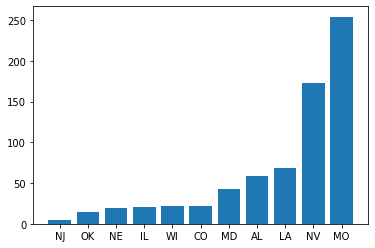

In [20]:
plt.bar(excess_parking_sorted.index,excess_parking_sorted.values)

In [21]:
# decommissioned parking spaces

In [22]:
filt=df1['Total Parking Spaces']>0

In [23]:
fillt=df1['Bldg Status']=='DECOMMISSIONED'

In [24]:
df2=df1[fillt]
df3=df2[filt]

C:\Users\qoyyum\AppData\Local\Temp/ipykernel_2372/1151478102.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df3=df2[filt]


In [25]:
df3.set_index('Bldg City',inplace=True)

<AxesSubplot:xlabel='Bldg City'>

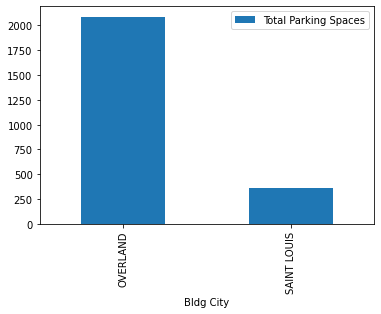

In [26]:
df3.plot(kind='bar')

In [27]:
# property type parking spaces in excess

In [28]:
excess_parking_property=pd.pivot_table(df1[df1['Bldg Status']=='EXCESS'],index='Property Type',values='Total Parking Spaces')

In [29]:
excess_parking_property

,Total Parking Spaces
Property Type,
BUILDING,57.791045
STRUCTURE,37.000000


In [30]:
# distribution of the owned or leased active parking spaces

In [31]:
active_parking=pd.pivot_table(df1[df1['Bldg Status']=='ACTIVE'],index='Owned/Leased',values='Total Parking Spaces',aggfunc='mean')

In [32]:
active_parking

,Total Parking Spaces
Owned/Leased,
LEASED,44.707349
OWNED,74.365997


array([<AxesSubplot:ylabel='Total Parking Spaces'>], dtype=object)

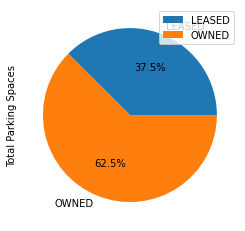

In [46]:
active_parking.plot(kind='pie',subplots=True,autopct='%1.1f%%')

In [34]:
#leased parking spaces

In [35]:
state_leased=pd.pivot_table(df1[df1['Owned/Leased']=='LEASED'],index='Bldg State',values='Total Parking Spaces')

In [36]:
state_leased.sort_values('Total Parking Spaces',ascending=False)

,Total Parking Spaces
Bldg State,
MO,107.762821
TX,73.457086
VA,72.476316
AL,64.055556
UT,62.505882
GA,62.425414
CO,58.647727
VT,56.128205
NM,51.926316


In [37]:
#active property type parking spaces

In [38]:
active_parking_property=pd.pivot_table(df1[df1['Bldg Status']=='ACTIVE'],index='Property Type',values='Total Parking Spaces')

In [39]:
active_parking_property

,Total Parking Spaces
Property Type,
BUILDING,51.134764
LAND,19.268908
STRUCTURE,70.779762


array([<AxesSubplot:ylabel='Total Parking Spaces'>], dtype=object)

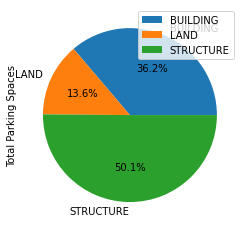

In [40]:
active_parking_property.plot(kind='pie',subplots=True,autopct='%1.1f%%')

<BarContainer object of 9060 artists>

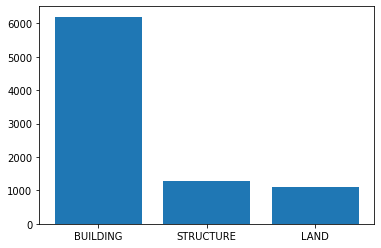

In [41]:
plt.bar(df1['Property Type'],df1['Total Parking Spaces'])

In [42]:
#states with zero  parking spaces

In [43]:
fiillt=df1['Total Parking Spaces']==0

In [44]:
zero_parking_space=pd.pivot_table(df1[fiillt],index='Bldg State',values='Total Parking Spaces')

In [45]:
zero_parking_space

,Total Parking Spaces
Bldg State,
AL,0
AR,0
AZ,0
CA,0
CO,0
CT,0
DC,0
DE,0
FL,0
